# Import Libraries

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
from numpy import set_printoptions

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold

# Evaluation
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score

# Other
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [2]:
data = pd.read_csv('Cancer.csv')
data = data.drop(columns=['id','Unnamed: 32'], axis=1)
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [3]:
data.shape

(569, 31)

In [4]:
data.isnull().values.any() # check for any missing values

False

In [5]:
data.diagnosis.value_counts() # show the distribution of M/B

B    357
M    212
Name: diagnosis, dtype: int64

# Train-test split

In [6]:
target = 'diagnosis'
X = data.loc[:, data.columns != target]
Y = data.loc[:, data.columns == target]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=52)
features = pd.DataFrame(list(X_train.columns.values))

# Baseline Model

In [7]:
# Establish a baseline for comparison using LOGISTIC REGRESSION
logreg = LogisticRegression(C=0.01)
lr = logreg.fit(X_train, y_train)
print("Baseline Logistic Regression")
print("Training set score:",lr.score(X_train, y_train))
print("Test set score:",lr.score(X_test, y_test))

Baseline Logistic Regression
Training set score: 0.9182058047493403
Test set score: 0.9473684210526315


# Filter Methods

### 1. Pearson's Correlation

It’s used to summarize the strength of the linear relationship between two data variables, which can vary between 1 and -1.
* 1 means a positive correlation: the values of one variable increase as the values of another increase.
* -1 means a negative correlation: the values of one variable decrease as the values of another increase.
* 0 means no linear correlation between the two variables.

The assumptions that the Pearson correlation coefficient makes:
* Both variables should be normally distributed.
* A linear relationship between the two variables.
* Data is equally distributed around the regression line

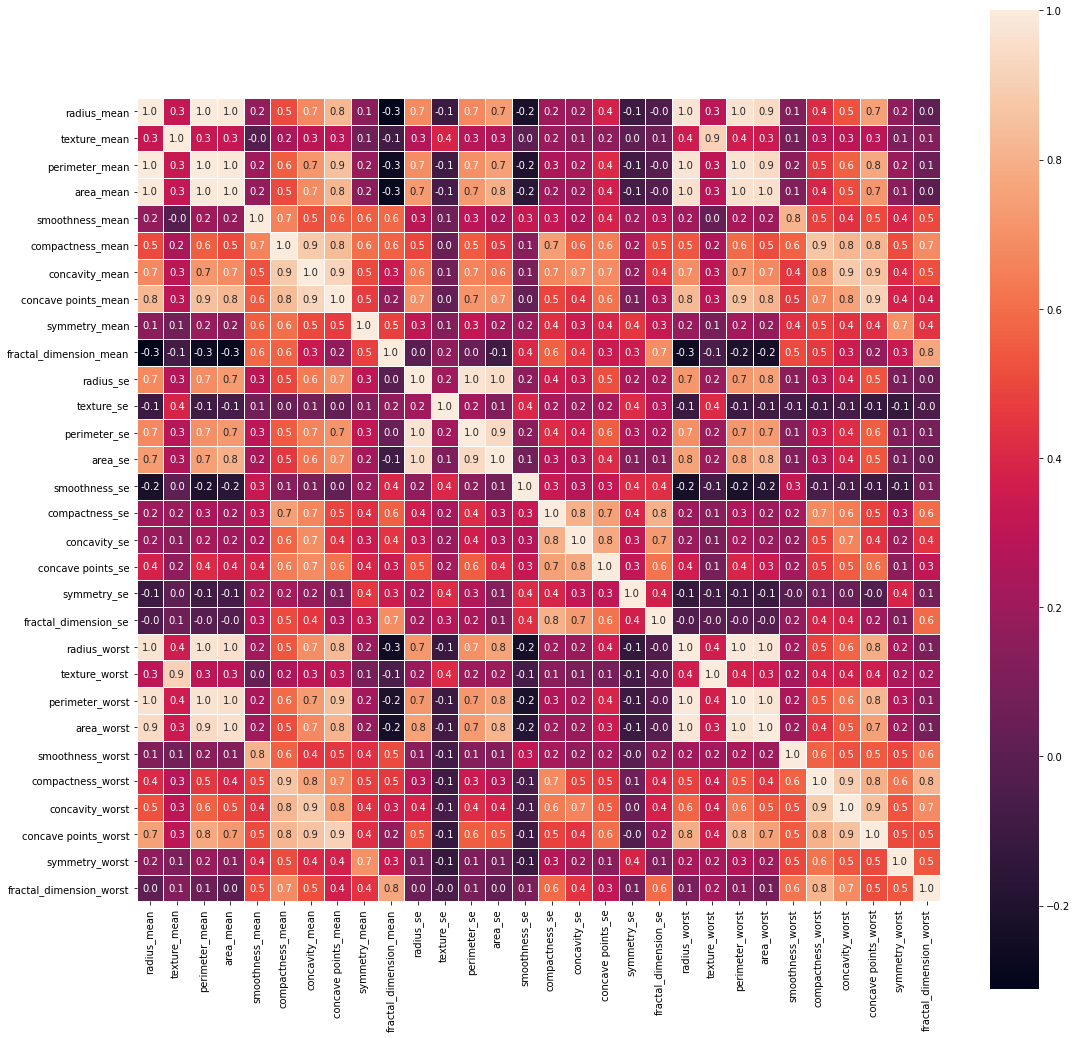

In [8]:
# Drop features with correlation >= 0.9

f = plt.figure(figsize=(18, 18))
ax = plt.subplot(aspect='equal')
corplot = sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [9]:
# 1)radius_mean: perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst 
# 2)texture_mean: texture_worst, Compactness_worst
# 3)Compactness_mean: concavity_mean
# 4)concave points_mean: concave points_worst
# 5)radius_se: perimeter_se, area_se
# 6)concavity_se: Compactness_se, concave points_se 

In [10]:
# Renew Dataset - Remove Corelated Features
deselect = ['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
            'texture_worst', 'compactness_worst','concavity_mean', 'concave points_worst',
            'perimeter_se', 'area_se', 'compactness_se', 'concave points_se']

X_train2 = X_train.drop(deselect,axis = 1)
X_test2 = X_test.drop(deselect,axis = 1) 
print(X_train2.shape)

(379, 17)


In [11]:
# test the model with selected features

lr = logreg.fit(X_train2, y_train)
print("Pearson Logistic Regression")
print("Training set score:",lr.score(X_train2, y_train))
print("Test set score:",lr.score(X_test2, y_test))

Pearson Logistic Regression
Training set score: 0.8918205804749341
Test set score: 0.9


### 2. Variance Threshold

* We simply compute the variance of each features, and we select the subset of features based on a user-specified threshold.
* We assume that features with a higher variance may contain more useful information.

In [12]:
selector = VarianceThreshold(threshold=0.01).fit(X_train) # variance 1%

print('Top', f, 'selected:')
X.columns[selector.get_support(indices=True)].tolist()

Top Figure(1296x1296) selected:


['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst']

In [13]:
# Renew Dataset

X_train8 = selector.transform(X_train)
X_test8 = selector.transform(X_test)

In [14]:
# test the model with selected features

lr = logreg.fit(X_train8, y_train)
print("Variance Threshold Logistic Regression")
print("Training set score:",lr.score(X_train8, y_train))
print("Test set score:",lr.score(X_test8, y_test))

Variance Threshold Logistic Regression
Training set score: 0.9182058047493403
Test set score: 0.9473684210526315


### 3. Chi-Square test

* The Chi-Square test of independence is used to determine if there is a significant relationship between two categorical (nominal) variables.
* If a feature is highly correlated with target  variable, then we retain it.

In [15]:
# number of features to select (hyperparameter)
f = 10 

In [16]:
# Step 1 - select only categorical variables from X_train using X_train_cat = X_train.select_dtypes(include= "object")

# Step 2 - Encode X_train_cat columns using X_train_cat = pd.get_dummies(X_train_cat)

# Step 3
# chi = SelectKBest(score_func=chi2, k=f).fit(X_train_cat, y_train)
# chiRanking = pd.DataFrame({'Feature':list(X_train.columns),'Scores':chi.scores_})
# chiRanking.sort_values(by='Scores', ascending=False)

# print('Top', f, 'selected:')
# X.columns[chi.get_support(indices=True)].tolist()

In [17]:
# Renew Dataset

# X_train7 = chi.transform(X_train)
# X_test7 = chi.transform(X_test)

In [18]:
# test the model with selected features

# lr = logreg.fit(X_train7, y_train)
# print("Chi2 Logistic Regression")
# print("Training set score:",lr.score(X_train7, y_train))
# print("Test set score:",lr.score(X_test7, y_test))

### 4. f test (Anova)

* A univariate test, Linear model for testing the individual effect of each feature on target.
* It’s well-suited for continuous numeric features and requires a binary target, but sklearn extends it to regression problems as well.

In [19]:
Anova = SelectKBest(score_func=f_classif, k=f).fit(X_train, y_train)
AnovaRanking = pd.DataFrame({'Feature':list(X_train.columns),'Scores':Anova.scores_})
AnovaRanking.sort_values(by='Scores', ascending=False)

print('Top', f, 'selected:')
X.columns[Anova.get_support(indices=True)].tolist()

Top 10 selected:


['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concavity_worst',
 'concave points_worst']

In [20]:
# Renew Dataset

X_train3 = Anova.transform(X_train)
X_test3 = Anova.transform(X_test)

In [21]:
# test the model with selected features

lr = logreg.fit(X_train3, y_train)
print("ANOVA Logistic Regression")
print("Training set score:",lr.score(X_train3, y_train))
print("Test set score:",lr.score(X_test3, y_test))

ANOVA Logistic Regression
Training set score: 0.9261213720316622
Test set score: 0.9631578947368421


# Wrapper Methods

In [22]:
# Wrapper Methods use Machine Learning for feature selection
# We will be using SVM algorithm as Learning Algorithm in Feature Selection process
model = LinearSVC(C=2.0)
model.fit(X_train, y_train)

LinearSVC(C=2.0)

### 1. Forward Feature Selection (FFS)

In [23]:
# note that you could perform a Hyperparameter estimation first
sfs = SFS(estimator=model, n_features_to_select=f, direction='forward').fit(X_train, y_train)
print('FFS:'f'{features[sfs.get_support()]}')

FFS:                       0
0            radius_mean
4        smoothness_mean
11            texture_se
12          perimeter_se
14         smoothness_se
15        compactness_se
18           symmetry_se
24      smoothness_worst
27  concave points_worst
28        symmetry_worst


In [24]:
# Renew Dataset

X_train4 = sfs.transform(X_train)
X_test4 = sfs.transform(X_test)

In [25]:
# test the model with selected features

lr = logreg.fit(X_train4, y_train)
print("FFS Logistic Regression")
print("Training set score:",lr.score(X_train4, y_train))
print("Test set score:",lr.score(X_test4, y_test))

svm = model.fit(X_train4, y_train)
print("FFS SVM")
print("Training set score:",svm.score(X_train4, y_train))
print("Test set score:",svm.score(X_test4, y_test))

FFS Logistic Regression
Training set score: 0.8733509234828496
Test set score: 0.9105263157894737
FFS SVM
Training set score: 0.9498680738786279
Test set score: 0.9368421052631579


### 2. Backward Feature Elimination (BFE)

In [26]:
sfs = SFS(model, n_features_to_select=f, direction='backward').fit(X_train, y_train)
print('BFE:'f'{features[sfs.get_support()]}')

BFE:                      0
2        perimeter_mean
3             area_mean
5      compactness_mean
7   concave points_mean
14        smoothness_se
16         concavity_se
18          symmetry_se
20         radius_worst
21        texture_worst
22      perimeter_worst


In [27]:
# Renew Dataset

X_train5 = sfs.transform(X_train)
X_test5 = sfs.transform(X_test)

In [28]:
# test the model with selected features

lr = logreg.fit(X_train5, y_train)
print("BFS Logistic Regression")
print("Training set score:",lr.score(X_train5, y_train))
print("Test set score:",lr.score(X_test5, y_test))

svm = model.fit(X_train5, y_train)
print("BFS SVM")
print("Training set score:",svm.score(X_train5, y_train))
print("Test set score:",svm.score(X_test5, y_test))

BFS Logistic Regression
Training set score: 0.9445910290237467
Test set score: 0.9631578947368421
BFS SVM
Training set score: 0.8944591029023746
Test set score: 0.9263157894736842


### 3. Recursive Feature Elimination (RFE)

In [29]:
# We have to input 2 parameters: 
# 1) Model (estimator) 
# 2) Number of Features (n_features_to_select)

```
Algorithm
---------
Step 1 - Select all features of dataset
Step 2 - Features will go to model*
Step 3 - Model will train and compute feature_importance score for each feature
Step 4 - Least important feature is removed
Step 5 - Repeat Steps 2 to 4 until  n_features_to_select condition is satisfied

*choose a Linear model which could compute weights (coef_) or 
choose a model like SVM/Decision Tree/Random Forest which could compute feature importance score (feature_importances_).
Both coef_ and feature_importances_ tell feature importance only.
```

In [30]:
rfe = RFE(estimator=model, n_features_to_select=f, step=1).fit(X_train, y_train)

RFEfeatures = pd.DataFrame({'Feature':list(X_train.columns),'Scores':rfe.ranking_})
RFEfeatures.sort_values(by='Scores', ascending=True).iloc[:f,:]

Feature  Scores
0         radius_mean       1
21      texture_worst       1
13            area_se       1
12       perimeter_se       1
22    perimeter_worst       1
6      concavity_mean       1
25  compactness_worst       1
26    concavity_worst       1
1        texture_mean       1
20       radius_worst       1

In [31]:
# Renew Dataset

X_train6 = rfe.transform(X_train)
X_test6 = rfe.transform(X_test)

In [32]:
# test the model with selected features

lr = logreg.fit(X_train6, y_train)
print("RFE Logistic Regression")
print("Training set score:",lr.score(X_train6, y_train))
print("Test set score:",lr.score(X_test6, y_test))

svm = model.fit(X_train6, y_train)
print("RFE SVM")
print("Training set score:",svm.score(X_train6, y_train))
print("Test set score:",svm.score(X_test6, y_test))

RFE Logistic Regression
Training set score: 0.9445910290237467
Test set score: 0.9578947368421052
RFE SVM
Training set score: 0.9393139841688655
Test set score: 0.9631578947368421


# Embedded Methods

In this method, model will train and check accuracy on different subset internally of features and select best among them. Remember how Random Forest works?? It aggregates a specified number of decision trees on different subset of features.

So no need to train and test in iterations like in wrapper methods.

The embedded method solves both issues we encountered with the filter and wrapper methods by combining their advantages. Here’s how:

* They take into consideration the interaction of features like wrapper methods do.
* They are faster like filter methods.
* They are more accurate than filter methods.
* They find the feature subset for the algorithm being trained.
* They are much less prone to overfitting.

### 1. Random Forest Classifier

In [33]:
#n_estimators = number of trees to build
rfc = RandomForestClassifier(n_estimators= 20, random_state=43)      
rfc = rfc.fit(X_train,y_train)

accuracy = accuracy_score(y_test, rfc.predict(X_test))
print('RandomForest : ', accuracy)

final_df = pd.DataFrame({"Features": X_train.columns, "Importances":rfc.feature_importances_})
final_df.set_index('Importances')
final_df.sort_values('Importances',ascending = False)
# final_df['Importances'].sum()

RandomForest :  0.9631578947368421


Features  Importances
27     concave points_worst     0.261047
23               area_worst     0.154753
22          perimeter_worst     0.125522
7       concave points_mean     0.075933
3                 area_mean     0.066896
2            perimeter_mean     0.043197
20             radius_worst     0.040836
6            concavity_mean     0.026966
12             perimeter_se     0.024821
0               radius_mean     0.023218
1              texture_mean     0.017405
16             concavity_se     0.016948
13                  area_se     0.015429
21            texture_worst     0.014556
25        compactness_worst     0.011665
26          concavity_worst     0.010496
24         smoothness_worst     0.009439
9    fractal_dimension_mean     0.006959
4           smoothness_mean     0.006936
29  fractal_dimension_worst     0.006892
5          compactness_mean     0.005657
19     fractal_dimension_se     0.005311
17        concave points_se     0.004621
8             symmetry_mean     0.004438
10                radius_se     0.003738
28           symmetry_worst     0.003727
15           compactness_se     0.003501
11               texture_se     0.003335
18              symmetry_se     0.003179
14            smoothness_se     0.002581

# References

* https://github.com/AparGarg99/Youtube/tree/main/Feature_Engineering
* https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/